<a href="https://colab.research.google.com/github/bhavini-jeloka/me604-robotics/blob/main/ME604_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Files

In [1]:
import numpy as np
from math import sqrt, atan2
import matplotlib.pyplot as plt
import copy

##Path Planning Algorithm

In [46]:
# known: robot radius R
# known: obstacle radius r
# check the boolean functions
# check the 'self' and all

class PathPlanning:

  def __init__(self):
    self.R = 0.1
    self.r = 0.5
    self.epsilon = 0.0001
    self.obstaclesList = [[1,1], [2, 3], [4,4], [5,1]]
    self.start = [0, 0]
    self.pseudoGoal = [5, 5]
    self.stepSize = 0.1
    self.N = 50
    self.workspace = [[0, 5], [0, 5]]


  def generateWP(self):
    np.random.seed(13) 
    self.V = [tuple(self.start), tuple(self.pseudoGoal)]
    # generate waypoints
    while len(self.V)<self.N:
      q = self.generateSample(self.workspace) # workspace obstacle 
      if not self.insideObstacle(q) and q not in self.V: # configuration space
        self.V.append(q)
    # return self.V


  def generateGraph(self): # dictionary from q what all points are accessible
    self.generateWP()
    self.graph = {}
    for q in self.V:
      E = []
      for p in self.V:
        if p == q:
          continue
        connect = self.generatePath(q,p)  # from q to p
        if not self.checkObstacleCollision(connect):
          E.append(p)
      self.graph[tuple(q)] = E
    return self.graph


  def computeDistanceTwoPoints(self, p1, p2):  
      x1, y1 = p1[0], p1[1]
      x2, y2 = p2[0], p2[1]
      return sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
  

  def angleBetweenVectors(self, v, w):
    v = np.array(v)
    w = np.array(w)
    angle = 0
    if np.linalg.norm(v)*np.linalg.norm(w) != 0.0:
        unit_vector_1 = v / np.linalg.norm(v)
        unit_vector_2 = w / np.linalg.norm(w)
        dot_product = np.dot(unit_vector_1, unit_vector_2)
        if abs(dot_product) > 1:
            dot_product = np.sign(dot_product)*1
        angle = np.arccos(dot_product)
    return angle


  def insideObstacle(self, q):
    for obstacle in self.obstaclesList:
      if self.computeDistanceTwoPoints(obstacle, q)<(self.r+self.R+self.epsilon):
        return True
    return False


  def generatePath(self, q, p):
    pq = np.array(p)-np.array(q)
    pq_hat = (pq)/np.linalg.norm(pq)
    path = []
    stepTaker = np.array(q)
    while self.computeDistanceTwoPoints(stepTaker, p) > self.stepSize:
      path.append(stepTaker)
      stepTaker = stepTaker + self.stepSize*pq_hat
    return path


  def checkObstacleCollision(self, path):
    for point in path:
      if self.insideObstacle(point):
        return True
    return False


  def generateSample(self, workspace):
    # as of now rectangular workspace parallel to x-y plane [[x_min, x_max], [y_min, y_max]]
    xLimit, yLimit = self.workspace
    xGen = np.random.uniform(xLimit[0], xLimit[1])
    yGen = np.random.uniform(yLimit[0], yLimit[1])
    return (xGen, yGen)


  def heuristic(self, graph, q):
    deviationFromGoal = []
    direction2goal = [self.pseudoGoal[0]-q[0],
                      self.pseudoGoal[1]-q[1]]
    for possibleNextPoint in graph[tuple(q)]:
        possibleNextStep = [possibleNextPoint[0]-q[0],
                            possibleNextPoint[1]-q[1]]
        deviationFromGoal.append(self.angleBetweenVectors(direction2goal, possibleNextStep))
    i = np.argmin(deviationFromGoal)
    return self.graph[tuple(q)][i]


  def pathSearch(self):
    currentPos = self.start
    optPath = [tuple(self.start)]
    graph = self.generateGraph()
    while tuple(self.pseudoGoal) not in optPath:
      newPos = self.heuristic(graph, currentPos)
      optPath.append(newPos)
      currentPos = copy.copy(newPos)

    # Plots    
    VforPlot = list(zip(*self.V))
    VforPlot_X = VforPlot[0]
    VforPlot_Y = VforPlot[1]

    PathforPlot = list(zip(*optPath))
    PathforPlot_X = PathforPlot[0]
    PathforPlot_Y = PathforPlot[1]

    fig, ax = plt.subplots(1, 1, figsize=(7, 7), sharex=True, gridspec_kw={'hspace': 0.2})
    circle1 = plt.Circle((1, 1), 0.5, color='r')
    circle2 = plt.Circle((2, 3), 0.5, color='r')
    circle3 = plt.Circle((4, 4), 0.5, color='r')
    circle4 = plt.Circle((5, 1), 0.5, color='r')
    ax.add_patch(circle1)
    ax.add_patch(circle2) 
    ax.add_patch(circle3)
    ax.add_patch(circle4) 
    ax.scatter(VforPlot_X, VforPlot_Y)
    ax.plot(PathforPlot_X, PathforPlot_Y, 'k')
    
    plt.show()

    return optPath


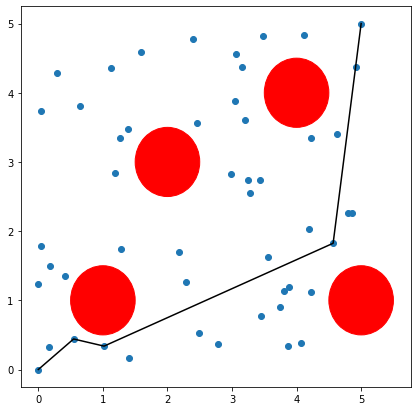

[(0, 0), (0.5465245403977281, 0.44126770014636996), (1.017990680777901, 0.3379944680178848), (4.566064034948215, 1.824579804431425), (5, 5)]


In [47]:
if __name__ == '__main__':
    bot = PathPlanning()
    print(bot.pathSearch())